# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import tsa
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_2017 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2017.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2018.csv', sep =',')
data_2019 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2019.csv', sep =',')

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


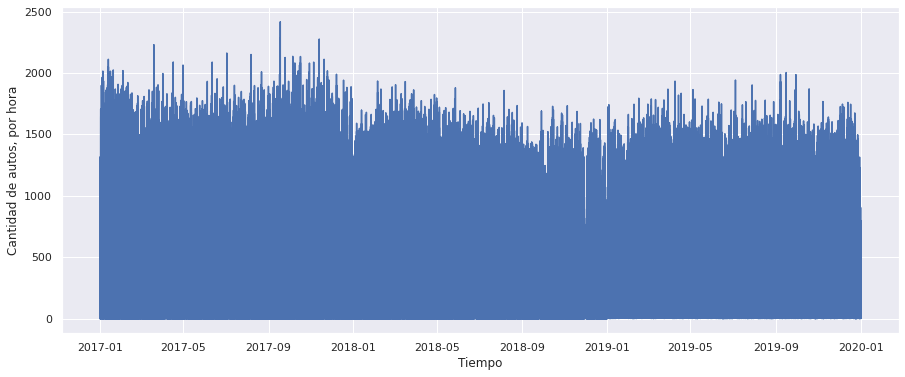

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

#EDA

In [16]:
data = pd.concat([data_2017,data_2018,data_2019])
data

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


In [17]:
data['fecha'] = pd.to_datetime(data.fecha, yearfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   periodo         int64         
 1   fecha           datetime64[ns]
 2   hora_inicio     int64         
 3   hora_fin        int64         
 4   dia             object        
 5   estacion        object        
 6   sentido         object        
 7   tipo_vehiculo   object        
 8   forma_pago      object        
 9   cantidad_pasos  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 298.8+ MB


In [18]:
data.groupby([data.fecha.dt.year])[['cantidad_pasos']].sum()

,cantidad_pasos
fecha,
2017,124833490
2018,123093692
2019,126710525


In [19]:
#Funcion que usare a lo largo del EDA
def porcentaje(x):
  total = data.cantidad_pasos.sum()
  return (x.sum()/total)*100


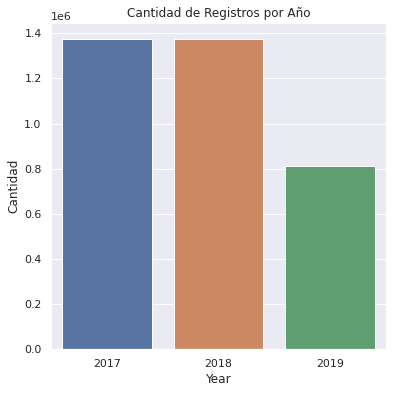

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x=data.periodo)
plt.title('Cantidad de Registros por Año')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.show();

In [21]:
data.groupby(['periodo'])[['cantidad_pasos']].count()

,cantidad_pasos
periodo,
2017,1372645
2018,1375908
2019,812153


In [22]:
data.groupby(['periodo'])[['cantidad_pasos']].agg(['sum', porcentaje])

cantidad_pasos           
                   sum porcentaje
periodo                          
2017         124833490  33.321123
2018         123093692  32.856728
2019         126710525  33.822149

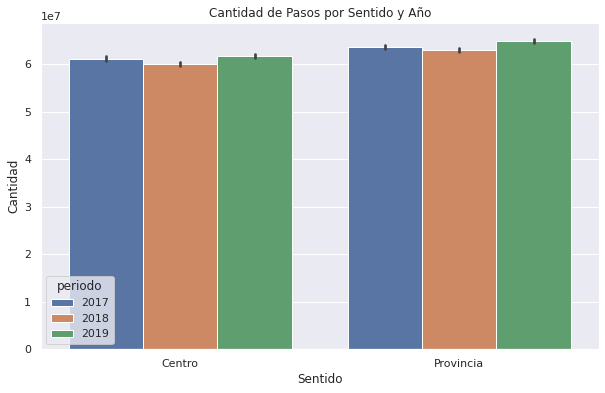

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.sentido, y=data.cantidad_pasos, hue=data.periodo, estimator=np.sum)
plt.title('Cantidad de Pasos por Sentido y Año')
plt.xlabel('Sentido')
plt.ylabel('Cantidad')
plt.show();

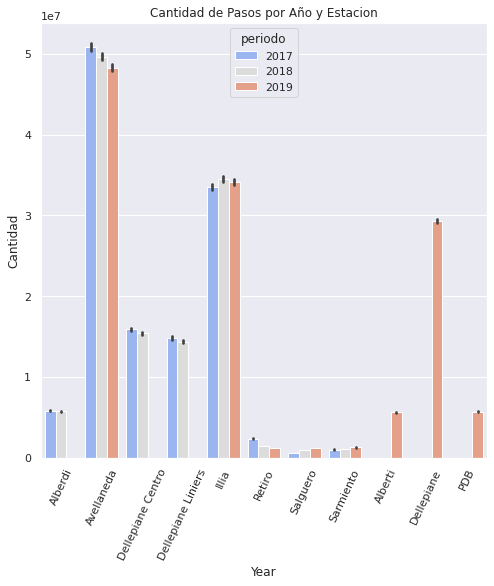

In [24]:
plt.figure(figsize=(8,8))
sns.barplot(x=data.estacion, y= data.cantidad_pasos, estimator=np.sum, hue= data.periodo, palette='coolwarm') 
plt.title('Cantidad de Pasos por Año y Estacion')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.xticks(rotation=65)
plt.show();

In [25]:
# Extrayendo el mes de la columna fecha
data['mes'] = data.fecha.dt.month_name()

In [26]:
data.groupby(['mes'])[['cantidad_pasos']].agg(['sum',porcentaje])

cantidad_pasos           
                     sum porcentaje
mes                                
April           29752986   7.941802
August          32597920   8.701185
December        32511272   8.678057
February        27311268   7.290048
January         29778381   7.948581
July            31676894   8.455341
June            30197868   8.060552
March           31642432   8.446142
May             31509291   8.410603
November        32766604   8.746211
October         33236614   8.871668
September       31656177   8.449811

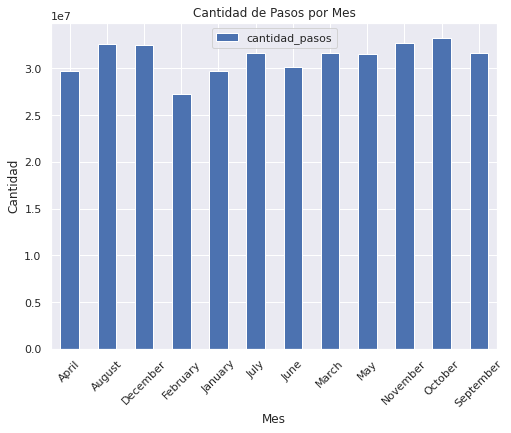

In [27]:
data.groupby(['mes'])[['cantidad_pasos']].sum().plot(kind='bar',figsize=(8,6))
#sns.barplot(x=data.mes, y=data.cantidad_pasos, estimator=sum)
plt.title('Cantidad de Pasos por Mes')
plt.ylabel('Cantidad')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show();

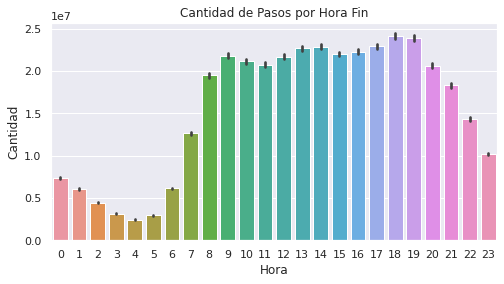

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(x=data.hora_fin, y=data.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Hora Fin')
plt.ylabel('Cantidad')
plt.xlabel('Hora')
plt.show();

In [29]:
data.forma_pago.value_counts(ascending=False)

TELEPASE                1027861
EFECTIVO                1020176
EXENTO                   464708
INFRACCION               405034
NO COBRADO               380450
TARJETA DISCAPACIDAD     186454
T. DISCAPACIDAD           76001
MONEDERO                     14
Otros                         8
Name: forma_pago, dtype: int64

In [30]:
# Unifique criterios para la columna forma de pago
data['forma_pago'] = data.forma_pago.apply(lambda x:'T. DISCAPACIDAD' if (x =='TARJETA DISCAPACIDAD') else x)

In [31]:
data.forma_pago.value_counts(ascending=False)

TELEPASE           1027861
EFECTIVO           1020176
EXENTO              464708
INFRACCION          405034
NO COBRADO          380450
T. DISCAPACIDAD     262455
MONEDERO                14
Otros                    8
Name: forma_pago, dtype: int64

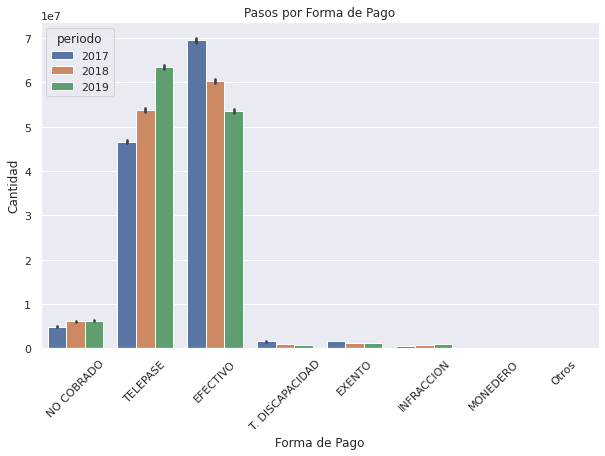

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x = data.forma_pago, y = data.cantidad_pasos, hue = data.periodo, estimator=np.sum)
plt.title('Pasos por Forma de Pago')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show();

In [33]:
data.groupby(['tipo_vehiculo','periodo'])[[ 'cantidad_pasos']].sum()

cantidad_pasos
tipo_vehiculo periodo                
Liviano       2017          113674277
              2018          112371359
              2019          112119160
Pesado        2017           11159213
              2018           10722333
              2019           14591365

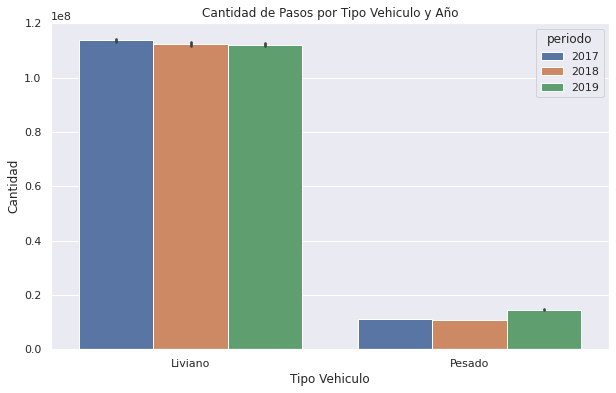

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.tipo_vehiculo, y=data.cantidad_pasos, hue=data.periodo, estimator=np.sum)
plt.title('Cantidad de Pasos por Tipo Vehiculo y Año')
plt.xlabel('Tipo Vehiculo')
plt.ylabel('Cantidad')
plt.show();

In [35]:
data.groupby(['tipo_vehiculo'])[['cantidad_pasos']].agg(['sum',porcentaje])

cantidad_pasos           
                         sum porcentaje
tipo_vehiculo                          
Liviano            338164796  90.264485
Pesado              36472911   9.735515

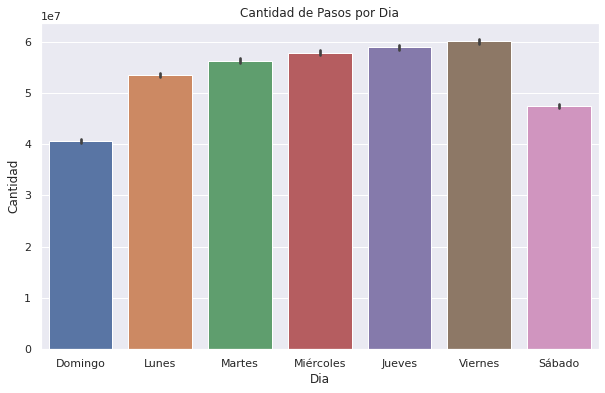

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.dia, y=data.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Dia')
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.show();

#Concluciones EDA

*   Apesar de que 2019 posee un numero menor de registros, tiene mayor numero de pasos de vehiculos.
  - 2017:	124.833.490
  - 2018:	123.093.692
  - 2019:	126.710.525

*  Encontramos que existen dos sentidos hacia los cuales transcurren los vehiculos: Centro y Provincia donde la cantidad total de vehiculos que transcurre es casi igual para cada sentido. Y se comporta de la misma manera cuando se discrimina entre años.

* Al unir los datasets encontramos 11 estaciones diferentes, pero no son las mismas entre años, es decir, que hay años donde existen estaciones que no existen en otros años.
  - Por ejemplo Dellepiane aparece para el año 2019 y no para los años 2017 y 2018.
  -Puede existir un error en la base de datos ya que para 2019 aparece la estacion "alberti" y para los años 2017 y 2018 aparece "alberdi".

* Encontramos que el mes con mayor cantidad de pasos de vehiculos es Octubre con 33.236.614 equivalente al 8.871668 % del total de pasos.

* El mes con menor numero de pasos de vehiculos es Febrero con 27.311.268 equivalente al 7.290048 %

* Al analizar las horas en que mas vehiculos reportan vemos que hay un comportamiento a la alza desde las 5:00 hasta las 9:00 donde se estabiliza hasta las 19:00 y alcanza su punto maximo a las 18:00.

* Apartir de las 19:00 se nota una tendencia a la baja aproximadamente hasta las 5:00 donde alcanza el punto mas bajo de flujo de vehiculos a las 4:00.

* Las formas de pagos mas usadas son Telepase y Efecivo.

* La forma de pago Efectivo fue disminuyendo su uso de un año a otro y en cambio la forma de pago Telepase fue aumentando de un año a otro.

* aproximadamente el 91% de los datos corresponde a vehiculos livianos y el resto a vehiculos pesados. Y las cantidades de vehiculos no varia mucho cuando se pasa de un año a otro, esto se cumple para los dos tipos de vehiculos.

* El dia de la semana que reporta mayor cantidad de vehiculos es el Viernes y el menor es el Domingo.



#Componentes de la Serie

- Diaria
- Semanal
- Mensual

**Diaria**

In [37]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


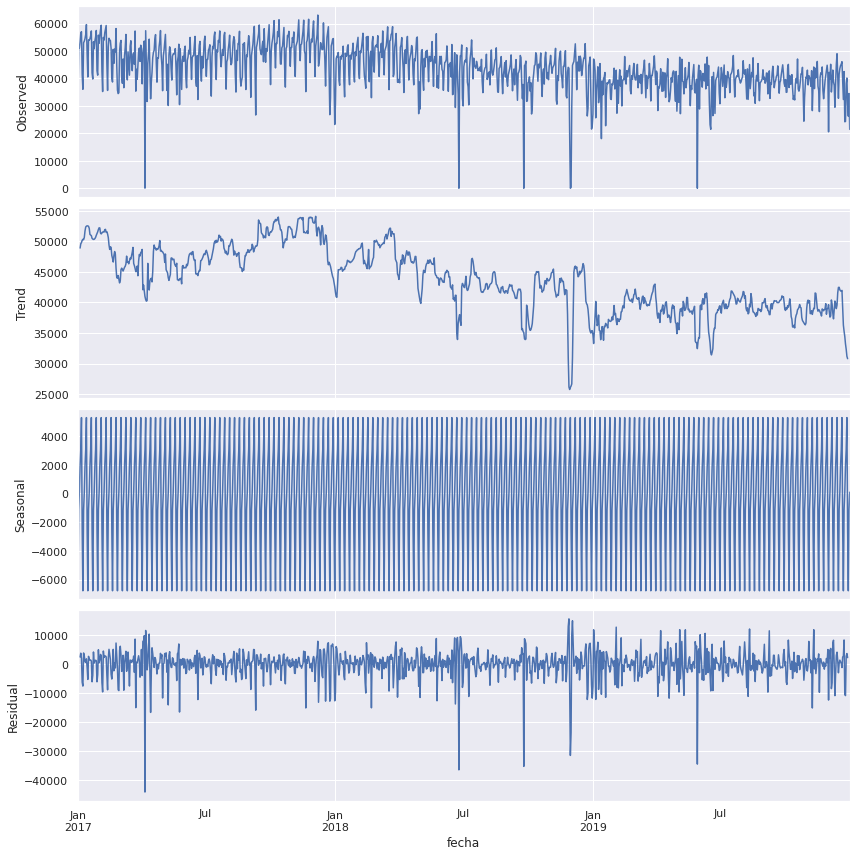

In [38]:
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Semanal**

In [39]:
semanal = dataset.resample('W',on='fecha').sum()
print('Shape: ', semanal.shape)
semanal.head()

Shape:  (158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


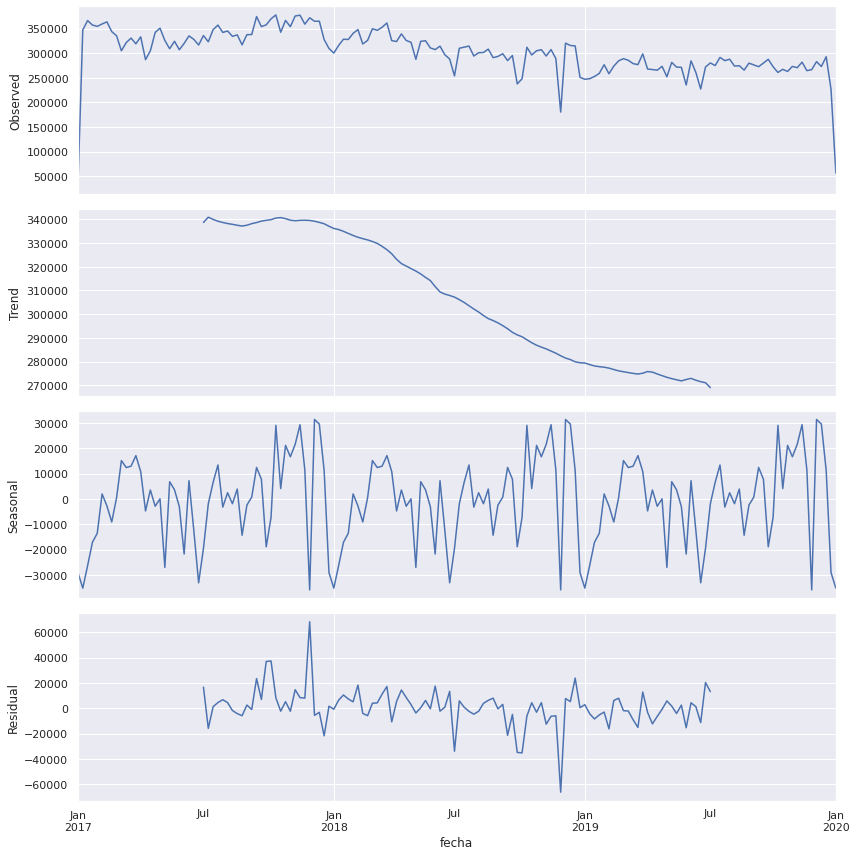

In [40]:
result= seasonal_decompose(semanal.cantidad_pasos, model='additive')
plt.rcParamsDefault['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Mensual**

In [41]:
mensual = dataset.resample('M',on='fecha').sum()
print('Shape: ',mensual.shape)
mensual.head()

Shape:  (36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


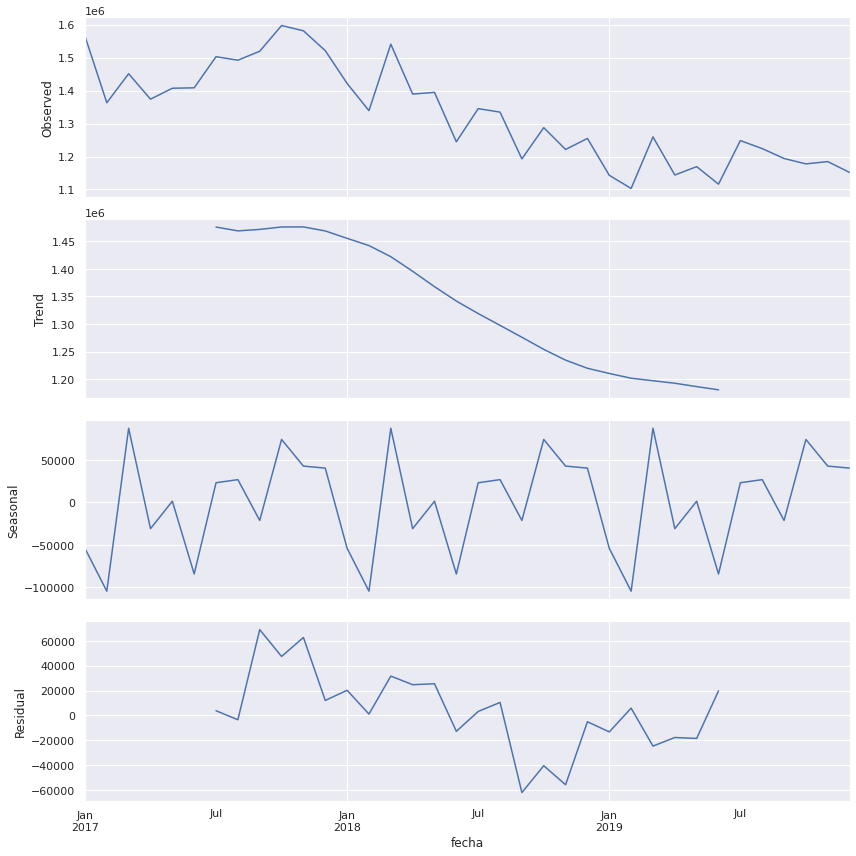

In [42]:
result = seasonal_decompose(mensual.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize']= (12,12)
result.plot()
plt.show()


#Conclusiones de Descomposion de la serie

Vemos como cada una de las graficas de las componentes de la serie se comportan de manera parecida apesar de que la agrupacion de los datos varia.

Por esta razon tome la decision de tomar la descomposion semanal como base para trabajar la serie de tiempo.

1. Si tomo la descomposion diaria debo calcular muchos valores a la hora de predecir que por ende implicaria una mayor probailidad de error al predecir.

2. Su comportamiento es muy parecido al comportamiento general de los datos que se toman diarios.

3. Si tomo los datos diarios se aumentan mucho los datos de entrenamiento por tanto implica mas recursos fisicos y si tomo los datos mensuales tengo muy pocos datos para uqe mi modelo pueda entrenar y capturar el comportamiento general de los datos.

Por lo cual la serie quedo de 158 valores en total.

#Eliminando atipicos

Inicialmente quitaremos los valores que corresponden a la primera fecha y a la ultima:

- Porque no sabemos en que dia empezo a contar esa semana.
- Como sabemos los primeros de enero viaja muy poca gente.







In [43]:
semanal.reset_index(inplace=True)

In [44]:
semanal

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-08,347212
2,2017-01-15,366413
3,2017-01-22,357215
4,2017-01-29,354581
...,...,...
153,2019-12-08,282891
154,2019-12-15,272960
155,2019-12-22,292881
156,2019-12-29,226390


In [45]:
semanal.cantidad_pasos[semanal.cantidad_pasos < 200000]

0       31183
100    180328
157     55970
Name: cantidad_pasos, dtype: int64

In [46]:
semanal.cantidad_pasos[semanal.cantidad_pasos < 200000] = np.nan
print('Nulos:', semanal.cantidad_pasos.isnull().sum())
semanal = semanal.interpolate()
print('Nulos:', semanal.cantidad_pasos.isnull().sum())


Nulos: 3
Nulos: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
semanal.loc[100]

fecha             2018-12-02 00:00:00
cantidad_pasos                 304708
Name: 100, dtype: object

In [48]:
print(semanal.shape)
semanal.drop(index=[0,157], inplace=True)
print(semanal.shape)

(158, 2)
(156, 2)


In [49]:
semanal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 156
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           156 non-null    datetime64[ns]
 1   cantidad_pasos  156 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


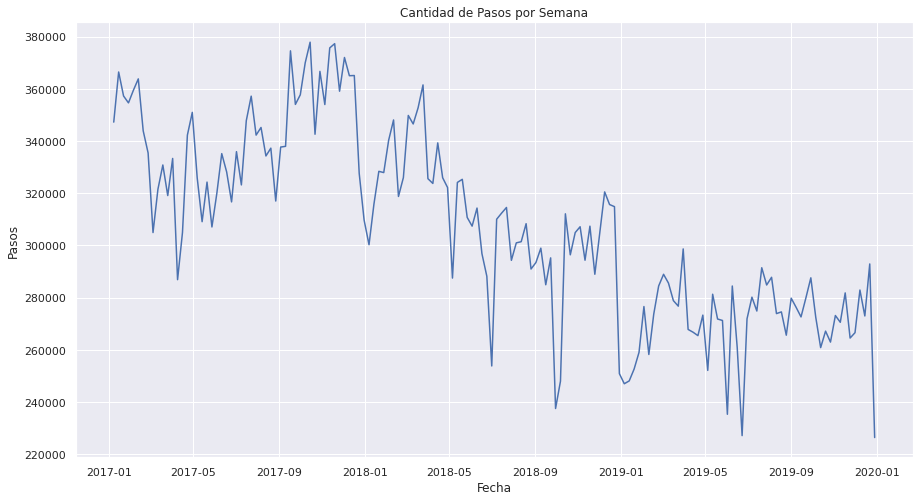

In [50]:
plt.figure(figsize=(15,8))
plt.plot(semanal.fecha, semanal.cantidad_pasos)
plt.title('Cantidad de Pasos por Semana')
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.show();

# Concluciones Valores Atipicos

Al ver las graficas y al analizar los valores que las graficas de los valores observados, tome la decision de que serian valores atipicos aquellos que en la columna cantidad_pasos fueran menor de 200.000 (cantidad_pasos < 200.000).
Se encontraron 3 valores atipicos en la serie que tenian como index los siguientes: 0, 100, 157.

como los index 0 y 157 corresponden al primer y ultimo valor de la serie se tomo la decision de eliminarlos, ya que de esta manera no se altera la serie y no se rompe la relacion con el tiempo que debe tener la serie.

Para imputar el valor correspondente al index 100, se uso la funicon interpolate(). Donde inicialmente tenia el valor de 180328 y luego de imputar quedo con  304708.




#Autocorrelacion

In [51]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

nlags =  semanal.shape[0]
autocorr = acf(semanal.cantidad_pasos, nlags = nlags)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [52]:
autocorr.shape

(156,)

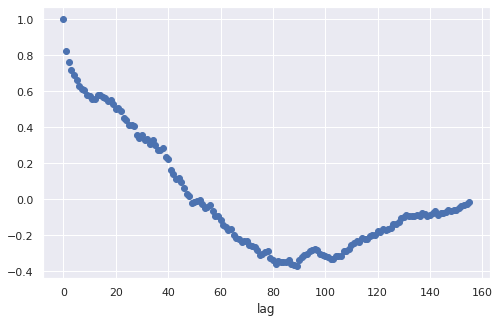

In [53]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags), autocorr)
plt.xlabel('lag');

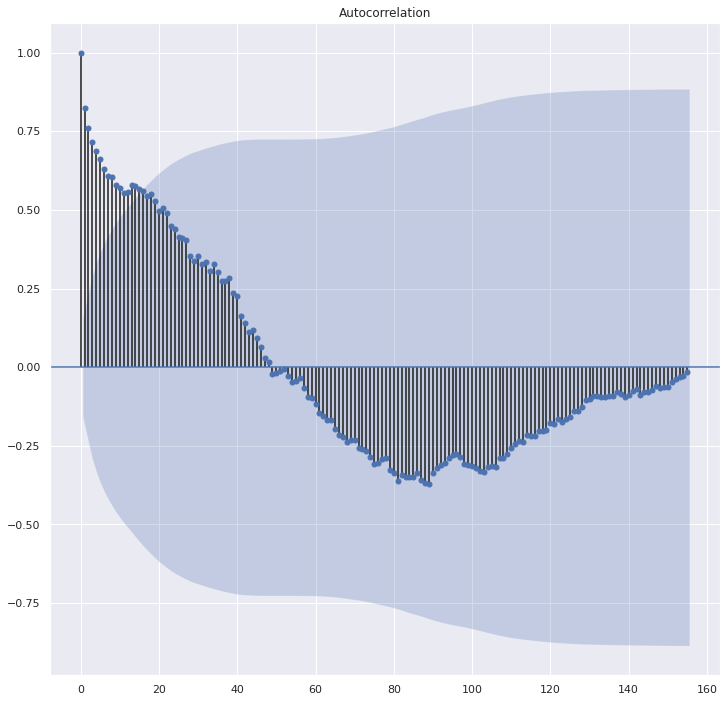

In [54]:
#plt.figure(figsize=(15,8))
plot_acf(semanal.cantidad_pasos, lags = semanal.shape[0]-1)
plt.show();

# Concluciones Autorelacion

Se usaron todos los 156 datos de la serie para hallar la autocorrelacion encontramos que el valor optimo para el **loop_back = 16**.

Por tanto nuestra matriz de datos quedara con 16 columnas.

#Matriz de Datos

In [55]:
senial = semanal.cantidad_pasos
senial.head()
senial.shape

(156,)

In [56]:
look_back = 16

In [57]:
N = senial.shape[0]
X = np.zeros((N - look_back,look_back))
y = np.zeros(N - look_back)
print(X.shape, y.shape)

(140, 16) (140,)


In [58]:
senial


1      347212.0
2      366413.0
3      357215.0
4      354581.0
5      359401.0
         ...   
152    266555.0
153    282891.0
154    272960.0
155    292881.0
156    226390.0
Name: cantidad_pasos, Length: 156, dtype: float64

In [59]:
 for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]
    

In [60]:
N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_train = (N - (N_test))- look_back # cantidad de instancias que vamos a usar para entrenar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(128, 16) (128,)
(12, 16) (12,)


#Matriz Train y Test

- X_train = (128,16)
- y_train = (128)
- X_test = (12,16)
- y_test = (12)

#Modelado

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

Tendremos 4 modelos, para los cuales se usara la metrica de RMSE para determinar cual es el mejor modelo. Los modelos a usar seran los siguientes:

- Modelo Benchmark: en el cual usaremos la semana inmediatamente anterior para asignarla como prediccion.

- Modelo RandomForest.

- Modelo SVM: Usaremos el SVR que es la variante paara regresiones.

- Modelo XGboost.

## BenchMarck

In [62]:
bench = semanal.copy()

In [63]:
bench['benchmark'] = semanal.cantidad_pasos.shift(periods=1)

In [64]:
bench.isnull().sum()

fecha             0
cantidad_pasos    0
benchmark         1
dtype: int64

In [65]:
bench.dropna(inplace=True)
bench.isnull().sum()

fecha             0
cantidad_pasos    0
benchmark         0
dtype: int64

In [66]:
bench.shape

(155, 3)

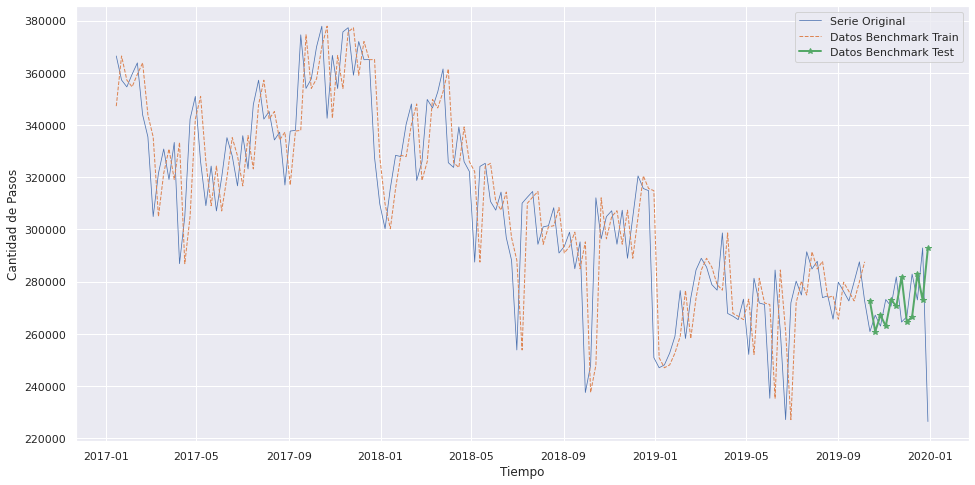

In [67]:
plt.figure(figsize=(16,8))
plt.plot(bench.fecha, bench.cantidad_pasos, lw = 0.75, label = 'Serie Original')
plt.plot(bench.fecha[:143], bench.benchmark[:143],'--', lw = 1, label = 'Datos Benchmark Train')
plt.plot(bench.fecha[-12:], bench.benchmark[-12:],'-*', lw = 2, label = 'Datos Benchmark Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [68]:
print("RMSE Train: ", np.sqrt(mean_squared_error(y_pred= bench.benchmark[:143], y_true=bench.cantidad_pasos[:143])))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_pred= bench.benchmark[-12:], y_true=bench.cantidad_pasos[-12:])))



RMSE Train:  19842.39839695183
RMSE Test:  22204.535604616158


## Concluciones Benchmark

* Para el modleo benckmark se tomo que para las predicciones asignarias el valor que tuvo la variable cantidad de pasos de la semana anterior.

* Se elimino el primer datos de la serie ya que para las predicciones tomaba el valor de nulo.

* La metrica usada fue el RMSE, Y se obtuvo un valor de:

  - RMSE Train:  19842.39839695183
  - RMSE Test:  22204.535604616158

##RandomForestRegressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
'''
grid = {
    'n_estimators':[50,75,100,150,200],
    'max_depth':np.arange(1,20)
}
tscv = TimeSeriesSplit(n_splits=12)
print("TimeSeriesSplit: ", tscv)

rf = RandomForestRegressor(random_state=42, n_jobs =-1)
model_grid = GridSearchCV(rf, param_grid=grid, cv=tscv, scoring='neg_mean_squared_error').fit(X_train,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

cv_r=pd.DataFrame(model_grid.cv_results_)
cv_r['mean_test_score']= np.sqrt(cv_r['mean_test_score'] * -1)
cv_r['split9_test_score']= np.sqrt(cv_r['split9_test_score'] * -1)
cv_r.mean_test_score.min()
'''

'\ngrid = {\n    \'n_estimators\':[50,75,100,150,200],\n    \'max_depth\':np.arange(1,20)\n}\ntscv = TimeSeriesSplit(n_splits=12)\nprint("TimeSeriesSplit: ", tscv)\n\nrf = RandomForestRegressor(random_state=42, n_jobs =-1)\nmodel_grid = GridSearchCV(rf, param_grid=grid, cv=tscv, scoring=\'neg_mean_squared_error\').fit(X_train,y_train)\nprint(model_grid.best_params_)\nprint(model_grid.best_score_)\n\ncv_r=pd.DataFrame(model_grid.cv_results_)\ncv_r[\'mean_test_score\']= np.sqrt(cv_r[\'mean_test_score\'] * -1)\ncv_r[\'split9_test_score\']= np.sqrt(cv_r[\'split9_test_score\'] * -1)\ncv_r.mean_test_score.min()\n'

In [71]:
#cv_r[cv_r.mean_test_score==cv_r.mean_test_score.min()]


In [72]:
#model_grid.best_estimator_

Metrica usada fue el negative mean squared error, pero se convirtio a RMSE:

- Mejores parametros son : {'max_depth': 4, 'n_estimators': 100}
- best_score = 21662.079381505588

In [73]:
rf_best = RandomForestRegressor(n_estimators=100 ,max_depth =4, n_jobs =-1,random_state=42).fit(X_train,y_train)

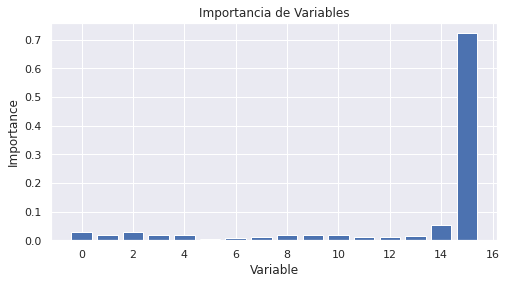

In [74]:
plt.figure(figsize = (8,4))
plt.bar(np.arange(rf_best.feature_importances_.size),rf_best.feature_importances_)
plt.title('Importancia de Variables')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.show();

In [120]:
rf_best.feature_importances_

array([0.02754996, 0.01758878, 0.02820935, 0.01869873, 0.01719091,
       0.00498423, 0.00640154, 0.01189205, 0.01957911, 0.01793344,
       0.01768785, 0.01047912, 0.01057426, 0.01540725, 0.05296402,
       0.72285939])

In [121]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

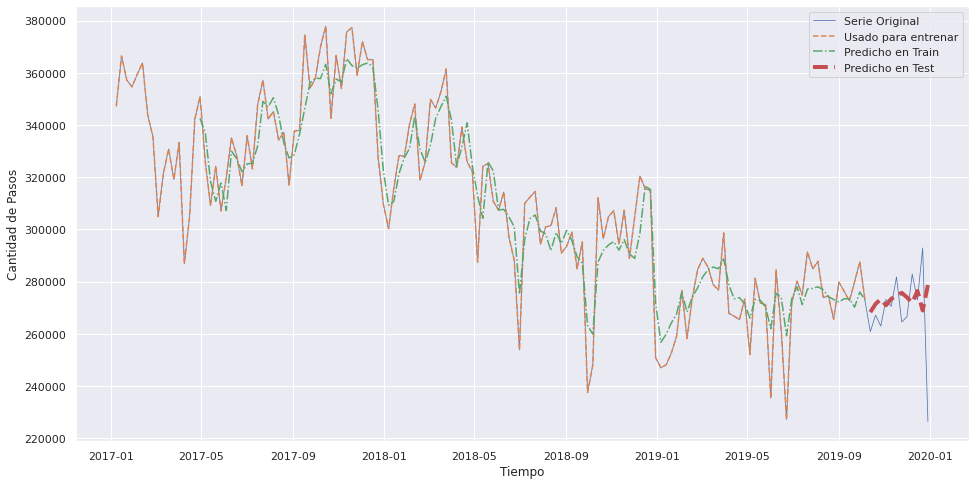

In [76]:
plt.figure(figsize=(16,8))
plt.plot(semanal.fecha[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.fecha[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.fecha[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(semanal.fecha[N_train+look_back: length_total], y_test_pred,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [77]:
print("RMSE Train: ", np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test)))

RMSE Train:  10801.06801012566
RMSE Test:  17955.426769196045


# Conlcuciones RandomForest

Al aplicar GridSearchCV con una validacion de 12 splits, nos arrojo que el mejor modelo tenia los siguientes parametros:

-  max_depth = 4
- n_estimator = 100

Al apicar dichos parametros tanto para los datos de train y test se obtuvieron estos resultados para RMSE:

- RMSE Train:  10801.06801012566
- RMSE Test:  17955.426769196045

##Support Vector Machine

In [78]:
%%time
from sklearn.svm import  SVC, SVR
svm = SVR(kernel='poly', degree=5, C= 0.9)

model_1= svm.fit(X_train,y_train)

pred_1_train = model_1.predict(X_train) 
pred_1_test = model_1.predict(X_test)


CPU times: user 1min 12s, sys: 66.7 ms, total: 1min 12s
Wall time: 1min 12s


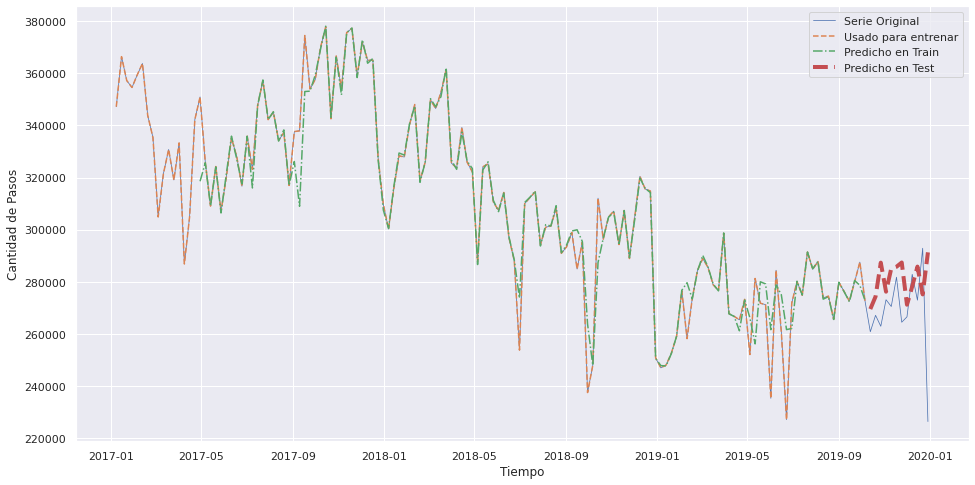

In [79]:
plt.figure(figsize=(16,8))
plt.plot(semanal.fecha[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.fecha[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.fecha[look_back: look_back + N_train], pred_1_train,'-.',label = 'Predicho en Train')
plt.plot(semanal.fecha[N_train+look_back: length_total], pred_1_test,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [80]:
print("RMSE Train: ", np.sqrt(mean_squared_error(y_pred=pred_1_train, y_true=y_train)))
print("RMSE Test: ",np.sqrt(mean_squared_error(y_pred=pred_1_test, y_true=y_test)))

RMSE Train:  8019.942425571678
RMSE Test:  22775.962693768157


## Concluciones SVM
Al ejecutar este modelo con un kernel = 'Poly' y un degree = 5, obtuve los siguientes valores:

- RMSE Train:  7604.728112448556
- RMSE Test:  22897.230521222744

**XGBRegressor**

In [81]:
from xgboost import XGBRegressor

'''
tscv = TimeSeriesSplit(n_splits=12)
print("TimeSeriesSplit: ", tscv)

grid = {
    'n_estimators':[50,75,100,150,200],
    'max_depth':np.arange(1,20),
    'learning_rate': [0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2],
    'nthread':[4], #when use hyperthread, xgboost may become slower
    'objective':['reg:squarederror']
}

xgb = XGBRegressor(n_jobs=-1)
model_xgb=GridSearchCV(xgb, param_grid=grid, cv=tscv).fit(X_train,y_train)
'''



'\ntscv = TimeSeriesSplit(n_splits=12)\nprint("TimeSeriesSplit: ", tscv)\n\ngrid = {\n    \'n_estimators\':[50,75,100,150,200],\n    \'max_depth\':np.arange(1,20),\n    \'learning_rate\': [0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2],\n    \'nthread\':[4], #when use hyperthread, xgboost may become slower\n    \'objective\':[\'reg:squarederror\']\n}\n\nxgb = XGBRegressor(n_jobs=-1)\nmodel_xgb=GridSearchCV(xgb, param_grid=grid, cv=tscv).fit(X_train,y_train)\n'

In [82]:
#print(model_xgb.best_params_)
#print(model_xgb.best_score_)

In [83]:
#cv_r2=pd.DataFrame(model_xgb.cv_results_)

In [84]:
#cv_r2['mean_test_score']= np.sqrt(cv_r2['mean_test_score'] * -1)

In [85]:
#cv_r2['split9_test_score']= np.sqrt(cv_r2['split9_test_score'] * -1)

In [86]:
#cv_r2.split9_test_score.min()

In [87]:
#cv_r2[cv_r2.split9_test_score==cv_r2.split9_test_score.min()]

In [88]:
#cv_r2.mean_test_score.min()

In [89]:
#cv_r2[cv_r2.mean_test_score==cv_r2.mean_test_score.min()]

In [90]:
xgb = XGBRegressor( max_depth=4, n_estimators=75, learning_rate=0.17, objective='reg:squarederror', nthread=4, n_jobs=-1,).fit(X_train,y_train)

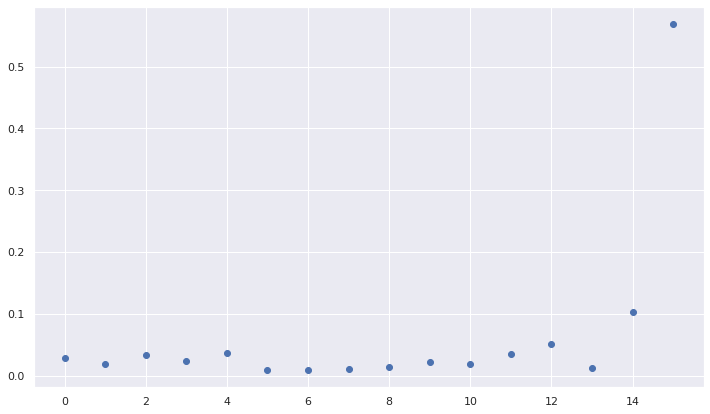

In [91]:
pred_2_train = xgb.predict(X_train) 

pred_2_test = xgb.predict(X_test)

plt.figure(figsize = (12,7))
plt.scatter(np.arange(xgb.feature_importances_.size),xgb.feature_importances_)
plt.show()

In [122]:
xgb.feature_importances_

array([0.02902217, 0.0198148 , 0.03423539, 0.0240193 , 0.03714672,
       0.00935024, 0.00946481, 0.01100944, 0.01440717, 0.02216254,
       0.01824924, 0.03508245, 0.05172474, 0.01324844, 0.10247231,
       0.56859034], dtype=float32)

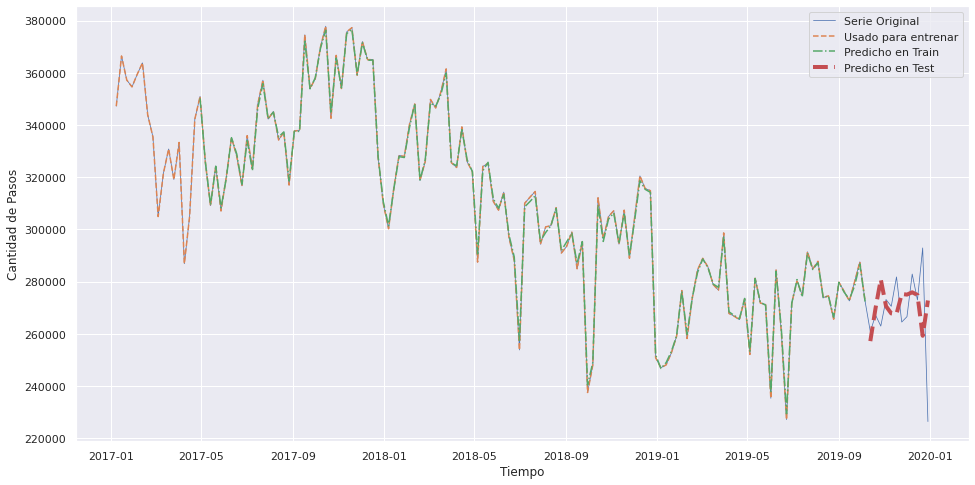

In [92]:
plt.figure(figsize=(16,8))
plt.plot(semanal.fecha[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.fecha[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.fecha[look_back: look_back + N_train], pred_2_train,'-.',label = 'Predicho en Train')
plt.plot(semanal.fecha[N_train+look_back: length_total], pred_2_test,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [93]:
print("RMSE Train: ", np.sqrt(mean_squared_error(y_pred=pred_2_train, y_true=y_train)))
print("RMSE Test: ",np.sqrt(mean_squared_error(y_pred=pred_2_test, y_true=y_test)))

RMSE Train:  1091.967702495397
RMSE Test:  18436.499080933092


## Concluciones XGboost

Al correr un GridSearch encontro que los mejores parametros fueron:

- max_depth=4
- n_estimators=75 
- learning_rate=0.17

De lo cual al correr el modelo con dichos parametros se encontro que obtuvimos unos valores de metrica de :

- RMSE Train:  1091.967702495397
- RMSE Test:  18436.499080933092

# Concluciones de los MODELOS

In [95]:
t_modelos = {
    'Modelos': ['Benchmark','RandomForest','SVR', 'XGBoost'],
    'RMSE Train': [19842.39839695183, 10801.06801012566, 7604.728112448556, 1091.967702495397],
    'RMSE Test': [22204.535604616158, 17955.426769196045, 22897.230521222744, 18436.499080933092]
}

t_modelos = pd.DataFrame(t_modelos)
t_modelos

,Modelos,RMSE Train,RMSE Test
0,Benchmark,19842.398397,22204.535605
1,RandomForest,10801.068010,17955.426769
2,SVR,7604.728112,22897.230521
3,XGBoost,1091.967702,18436.499081


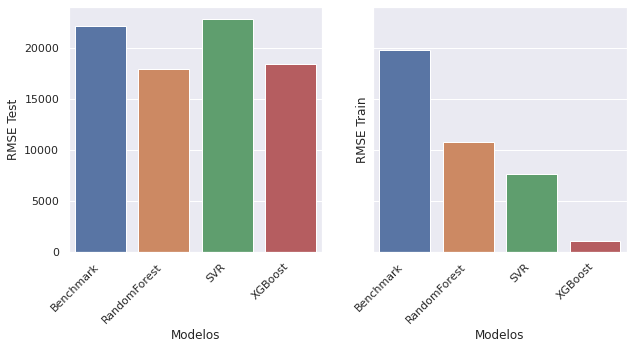

In [96]:
fig, axs = plt.subplots(1,2,figsize= (10,5), sharey= True,)
sns.barplot(data=t_modelos, x= 'Modelos', y='RMSE Test', ax= axs[0])
sns.barplot(data=t_modelos, x= 'Modelos', y='RMSE Train', ax= axs[1]);
fig.autofmt_xdate(rotation=45)

Encontramos que el mejor Modelo en Train es:

- XgBoost

EL mejor modelo en Test:

- RandomForest

Nota: Teniendo en cuenta que en Test estan muy cerca donde:

- Randomforest: 
  - Train 10801.068010 
  - Test	17955.426769

- XGboost:
  - Train 1091.967702 
  - Test	18436.499081	


Podemos ver que en train el Xgboost gana notablemente y en test el randomforest gana por muy poca diferencia, por ello probare los dos modelos con los datso de validacion. Cuyos datos son el primer trimestre del año 2020.

# Validacion Con Datos 2020

Cargamos los datos del 2020 y luego los concatenaremos con los datos del 2019 para grupar por semanas.

Teniendo en cuenta que nuesta anterior aurocorrelacion  nos dio que son necesarias 16 semanas para predecir un valor, necesitaremos las ultimas 16 semanas de 2019 para asi poder predecir la primera semana del 2020.

In [97]:
data_2020 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2020.csv', sep =',')
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [98]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


Organizamos dataset de 2020

In [99]:
df_2020 = data_2020.copy()
mask = np.logical_and(df_2020.estacion=='ILLIA', (df_2020.forma_pago == 'Efectivo'))
df_2020 = df_2020[mask]
df_2020.drop(columns = ['hora_inicio','periodo', 'estacion', 'mes', 'dia', 'dia_fecha', 'tipo_vehiculo', 'observacion', 'forma_pago', 'sentido'], inplace = True)
df_2020['fecha2'] = pd.to_datetime(df_2020.fecha) + pd.to_timedelta(df_2020.hora_fin, unit = 'h')
df_2020.drop(columns = ['hora_fin','fecha'], inplace = True)
df_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df_2020.sort_values('fecha', inplace = True)
df_2020.reset_index(drop=True, inplace = True)
df_2020

,cantidad_pasos,fecha
0,7.0,2020-01-01 00:00:00
1,423.0,2020-01-01 00:00:00
2,467.0,2020-01-01 00:00:00
3,6.0,2020-01-01 00:00:00
4,1.0,2020-01-01 00:00:00
...,...,...
52369,222.0,2020-12-31 20:00:00
52370,106.0,2020-12-31 21:00:00
52371,5.0,2020-12-31 21:00:00
52372,1.0,2020-12-31 21:00:00


Organizamos el dataset de 2019 para poder trabajar en el.

In [100]:
df_2019 = data_2019.copy()
mask = np.logical_and(df_2019.estacion=='Illia', (df_2019.forma_pago == 'EFECTIVO'))
df_2019 = df_2019[mask]
df_2019.drop(columns = ['hora_inicio','periodo', 'estacion', 'dia', 'tipo_vehiculo', 'forma_pago', 'sentido'], inplace = True)
df_2019['fecha2'] = pd.to_datetime(df_2019.fecha) + pd.to_timedelta(df_2019.hora_fin, unit = 'h')
df_2019.drop(columns = ['hora_fin','fecha'], inplace = True)
df_2019.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df_2019.sort_values('fecha', inplace = True)
df_2019.reset_index(drop=True, inplace = True)
df_2019

,cantidad_pasos,fecha
0,644,2019-01-01 00:00:00
1,630,2019-01-01 00:00:00
2,9,2019-01-01 00:00:00
3,3,2019-01-01 00:00:00
4,537,2019-01-01 02:00:00
...,...,...
34638,2,2019-12-31 22:00:00
34639,556,2019-12-31 22:00:00
34640,1,2019-12-31 22:00:00
34641,214,2019-12-31 23:00:00


In [101]:
df_2019_2020 = pd.concat([df_2019, df_2020])
df_2019_2020.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87017 entries, 0 to 52373
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cantidad_pasos  87017 non-null  float64       
 1   fecha           87017 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 MB


In [102]:
df_2019_2020.shape

(87017, 2)

In [103]:
df_2019_2020.sort_values('fecha', ignore_index=True, inplace = True)
df_2019_2020

,cantidad_pasos,fecha
0,644.0,2019-01-01 00:00:00
1,630.0,2019-01-01 00:00:00
2,9.0,2019-01-01 00:00:00
3,3.0,2019-01-01 00:00:00
4,537.0,2019-01-01 02:00:00
...,...,...
87012,222.0,2020-12-31 20:00:00
87013,1.0,2020-12-31 21:00:00
87014,106.0,2020-12-31 21:00:00
87015,5.0,2020-12-31 21:00:00


In [104]:
semanal_2019_2020 = df_2019_2020.resample("W",on='fecha').sum()
semanal_2019_2020

,cantidad_pasos
fecha,
2019-01-06,224395.0
2019-01-13,248077.0
2019-01-20,252617.0
2019-01-27,259019.0
2019-02-03,276568.0
...,...
2020-12-06,68580.0
2020-12-13,65435.0
2020-12-20,73578.0


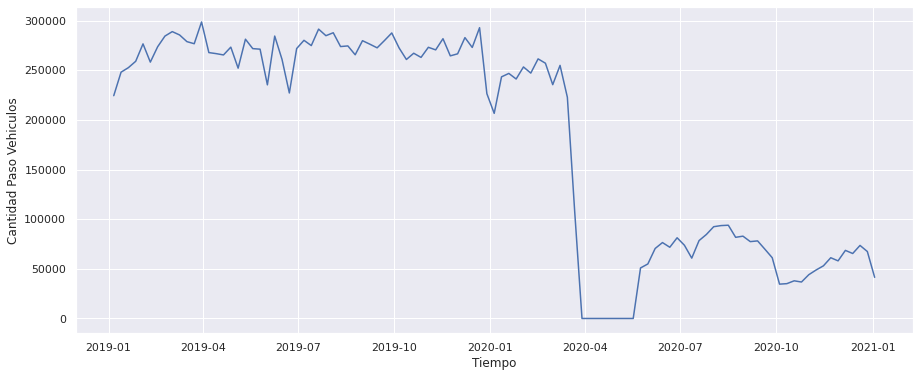

In [105]:
plt.figure(figsize = (15,6))
plt.plot(semanal_2019_2020.index, semanal_2019_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Paso Vehiculos')
plt.show()

# 2020

Inicialmente podemos atribuir esa caida tan drastica en el flujo de vehiculos a la pandemia. Recordando que para esa epoca casi todos los paises estaban en cierre total, por ellos podemos ver que llego a 0 el flujo de vehiculos y6 se mantuvo por un tiempo.

**NOTA:** Pro ellos solo analizaremos y trabajaremos los datos sobre los cuales hay flujo de vehiculos.

## Datos de Validacion

Sacamos las 12 semanas que vamos a validar, que corresponden al primer trimestre del 2020.  se escogio la fecha del 23 de marzo porque apartir de empeiza el intervalo de valor que estan en 0 para el paso de vehiculos.

In [106]:
semanal_2019_2020[semanal_2019_2020['cantidad_pasos'] == 0]

,cantidad_pasos
fecha,
2020-03-29,0.0
2020-04-05,0.0
2020-04-12,0.0
2020-04-19,0.0
2020-04-26,0.0
2020-05-03,0.0
2020-05-10,0.0


In [107]:
start_date = '2020-01-01'
end_date = '2020-03-23'

y_validacion = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
].values
y_validacion.shape

(12, 1)

Aqui encontramos la semana apartir de la cual debemos empezar armar la matriz de validacion.

In [108]:
semanal_2019_2020[semanal_2019_2020.index < start_date][-16:]

,cantidad_pasos
fecha,
2019-09-15,272592.0
2019-09-22,279927.0
2019-09-29,287568.0
2019-10-06,272483.0
2019-10-13,260840.0
2019-10-20,267147.0
2019-10-27,262950.0
2019-11-03,273129.0
2019-11-10,270536.0


In [109]:
start_date = '2019-09-15'
end_date = '2020-03-23'

datos_validacion = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
].values
datos_validacion.shape

(28, 1)

In [110]:
datos_validacion = pd.DataFrame(datos_validacion)
datos_validacion.columns = ['cantidad_pasos']
datos_validacion

,cantidad_pasos
0,272592.0
1,279927.0
2,287568.0
3,272483.0
4,260840.0
5,267147.0
6,262950.0
7,273129.0
8,270536.0
9,281790.0


## Creamos la matriz de 0 donde guardaremos los datos de la amtriz de validacion

In [111]:
senial_validacion = datos_validacion.cantidad_pasos
X_validacion = np.zeros((y_validacion.shape[0],16))
X_validacion.shape

(12, 16)

## Llenaremos los valores de la matriz de validacion que aun estan en 0.

In [112]:
look_back = 16
for i in range(12):
  X_validacion[i,:] = senial_validacion.iloc[i:i+look_back]  

In [113]:
X_validacion.shape

(12, 16)

In [114]:
X_validacion

array([[272592., 279927., 287568., 272483., 260840., 267147., 262950.,
        273129., 270536., 281790., 264500., 266555., 282891., 272960.,
        292881., 226390.],
       [279927., 287568., 272483., 260840., 267147., 262950., 273129.,
        270536., 281790., 264500., 266555., 282891., 272960., 292881.,
        226390., 206593.],
       [287568., 272483., 260840., 267147., 262950., 273129., 270536.,
        281790., 264500., 266555., 282891., 272960., 292881., 226390.,
        206593., 243359.],
       [272483., 260840., 267147., 262950., 273129., 270536., 281790.,
        264500., 266555., 282891., 272960., 292881., 226390., 206593.,
        243359., 246818.],
       [260840., 267147., 262950., 273129., 270536., 281790., 264500.,
        266555., 282891., 272960., 292881., 226390., 206593., 243359.,
        246818., 241192.],
       [267147., 262950., 273129., 270536., 281790., 264500., 266555.,
        282891., 272960., 292881., 226390., 206593., 243359., 246818.,
        24119

# Evaluamos los modelos con los datos de Validacion


In [115]:
start_date = '2019-09-15'
end_date = '2020-03-23'

grafica_2019_2020 = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
]
grafica_2019_2020.iloc[-12:,:].index

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22'],
              dtype='datetime64[ns]', name='fecha', freq='W-SUN')

Este ultimo slice que realizamos es para grafiar los datos predichos para los datos de validacion.

## RandomForest

In [116]:
y_pred_val = rf_best.predict(X_validacion)
print('RMSE Validacion: ',np.sqrt(mean_squared_error(y_validacion, y_pred_val)))

RMSE Validacion:  56678.69452636382


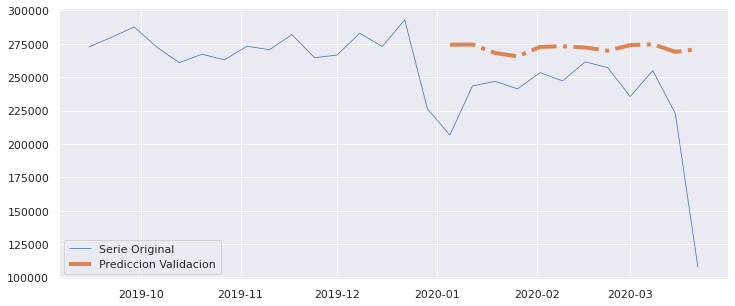

In [117]:
plt.figure(figsize=(12,5))
plt.plot(grafica_2019_2020.index, grafica_2019_2020.cantidad_pasos,lw = 0.75, label = 'Serie Original')
plt.plot(grafica_2019_2020.iloc[-12:,:].index, y_pred_val,'-.', lw = 4, label = 'Prediccion Validacion')
plt.legend()
plt.show()


## Xgboost

In [118]:
y_pred_val_xgb = xgb.predict(X_validacion)
print('RMSE Validacion: ',np.sqrt(mean_squared_error(y_validacion, y_pred_val_xgb)))

RMSE Validacion:  56986.801165980185


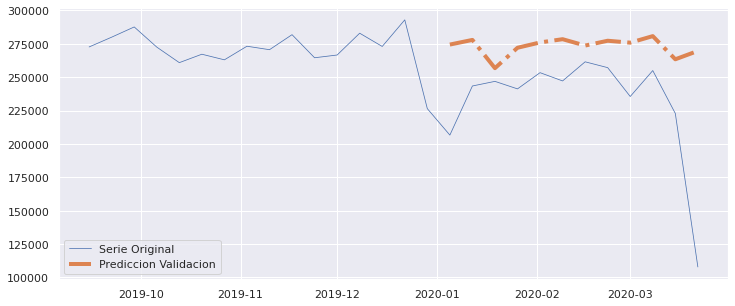

In [119]:
plt.figure(figsize=(12,5))
plt.plot(grafica_2019_2020.index, grafica_2019_2020.cantidad_pasos,lw = 0.75, label = 'Serie Original')
plt.plot(grafica_2019_2020.iloc[-12:,:].index, y_pred_val_xgb,'-.', lw = 4, label = 'Prediccion Validacion')
plt.legend()
plt.show()

## Concluciones VALIDACION MODELOS

Podemos ver como los dos modelos tienden a predecir por encima de los datos reales y una de las razones puede ser que los datos a medida que pasan los años van tendiendo a la baja.

tal vez se obtuvo un valor de RMSE mas alta la validacion que el test, ya que la validacion perdio un secuencia en el tiempo al que el test nunca se uso para entenar y luego predecir los datos de validacion.

la mayoria de los modelos tendieron al sobreajuste, ya que en el train se comportaron muy bien pero en el test y en la validacion no lo hicieron tan bien.


Luego de evaluar los dos mejores modelos que tuve para los datos de entrenamiento obtuve:

- Randomforest: RMSE 56678.69452636382
- XGboost: RMSE 56986.801165980185

Por tanto el modelo que mejores resultados me dio fue el **RandomForest**
- Train: 10801.068010
- Test: 17955.426769
- Validacion: 56678.69452636382 

# CONCLUCIONES FINALES

- Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

  * Al realizar la autocorrelacion nos dio que con 16 semanas encontrariamos informacion para predecir la siguiente. 
  
  * Pero al mirar las graficas de importancia de de las variables, como en el randomforest y el xgboost vemos que los modelos usan la semana 15 y la 16.
  Donde la 15  el randomforest tiene una importancia de 0.05296402 y en el xgboost de 0.10247231. Y la semana 16 en el randomforest tiene 0.72285939 y e el xgboost posee 0.56859034 de importancia. 

  Entre las ultimas dos semanas le aportan a sus respectivos modelos:
  - Xgboost = 66.9 % 
  - Randomforest = 72.3 %

- Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona? Mirar Concluciones de la validacion

- Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados? 
  Para este proyecto no lo realizare pero para el siguiente proyecto si.

-  Luego de resolver este 3er proyecto. Para el 4to. voy a intentar mejorarlo y lo hare usando otros modelos de machine learning mas avanzados, tales como:
  - prophet.
  - ARIMA.
  - Redes NEuronales (LSTM)

  y volvere a mirar cual se comporta mejor para los datos de validacion.

¿Hay algo que te gustaría investigar o probar?

Me gustaria Probar ingresando mas informacion al modelo, ya sea tipo de vehiculo, hora, dia, las diferentes formas de pago y sentido. Que al ingresar la fecha nos diga cuantos vehiculos de cada tipo podran pasar, que cantidad usaran las diferentes formas de pago.. etc y creo que esto se podria realizar con redes neuronales.